In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats

Connection Establishment

In [3]:
from sqlalchemy import create_engine

In [4]:
engine = create_engine(
    "mssql+pyodbc://localhost/vendor_project?"
    "driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

Loading the dataset

In [6]:
df = pd.read_sql("select * from vendor_sales_summary",engine)

In [8]:
df.head()

,vendornumber,vendorname,brand,description,purchaseprice,actualPrice,volume,totalPurchaseQuantity,totalPurchaseDollars,totalSalesQunatity,totalSalesDollars,totalSalesPrice,totalExciseTax,totalFreightCharges,grossProfit,profitMargin,stockTurnover,salesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


Exploratory Data Analysis

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendornumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
purchaseprice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
actualPrice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
totalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
totalPurchaseDollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
totalSalesQunatity,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
totalSalesDollars,10692.0,42239.074419,167655.265984,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06
totalSalesPrice,10692.0,18793.783627,44952.773386,0.000000,289.710000,2857.800000,16059.562500,6.728193e+05


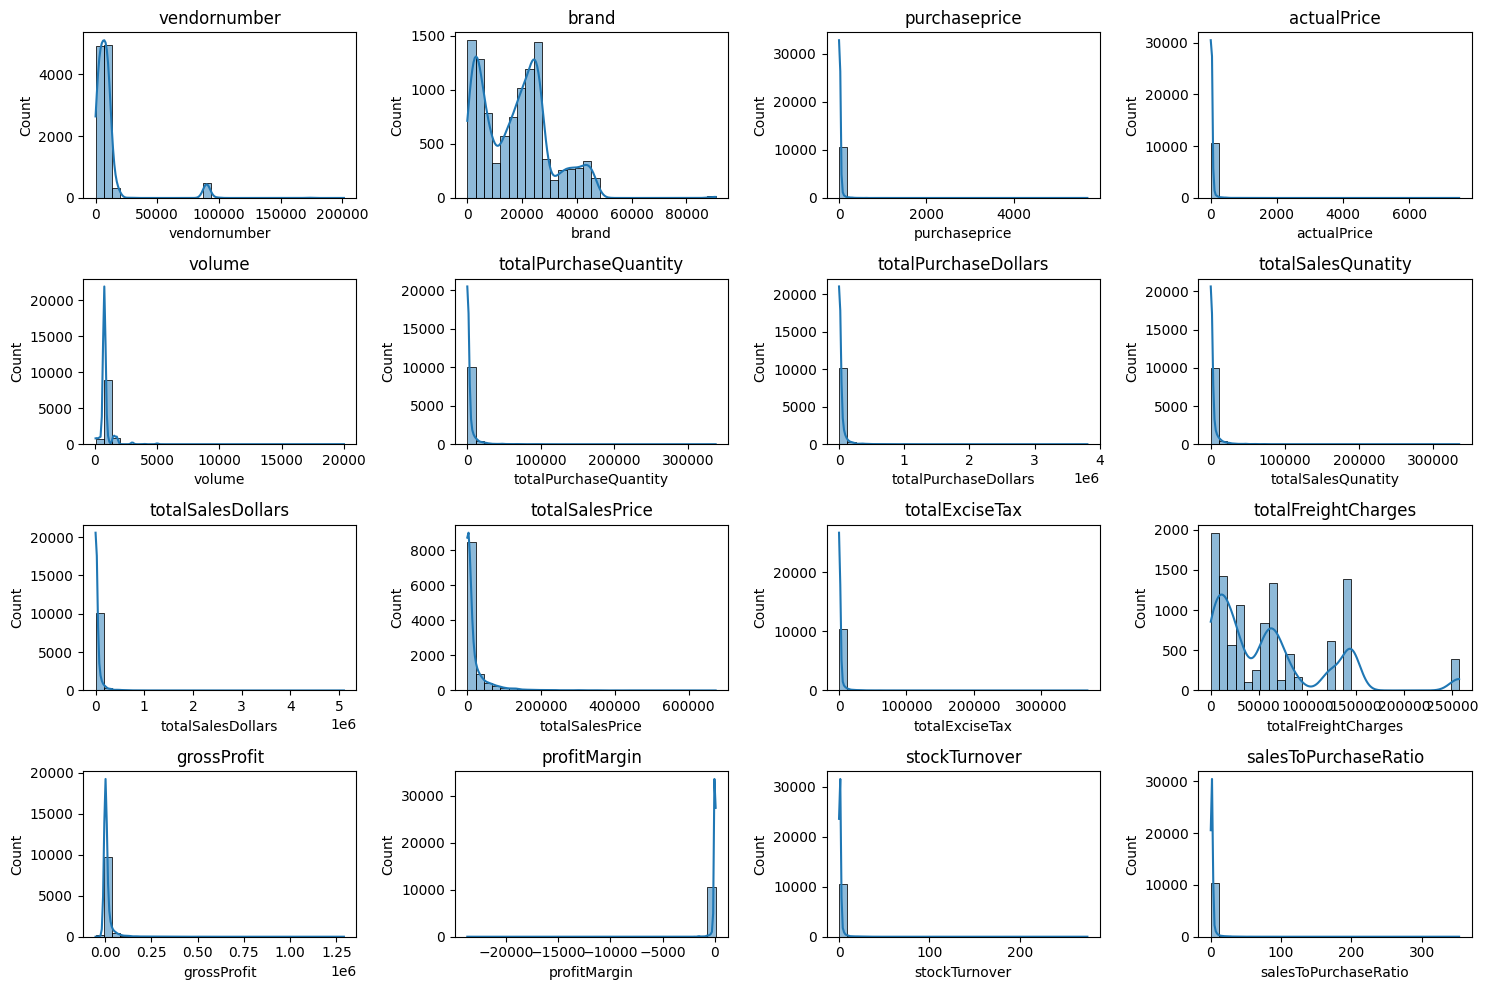

In [11]:
# Distribution Plot for Numerical Columns

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

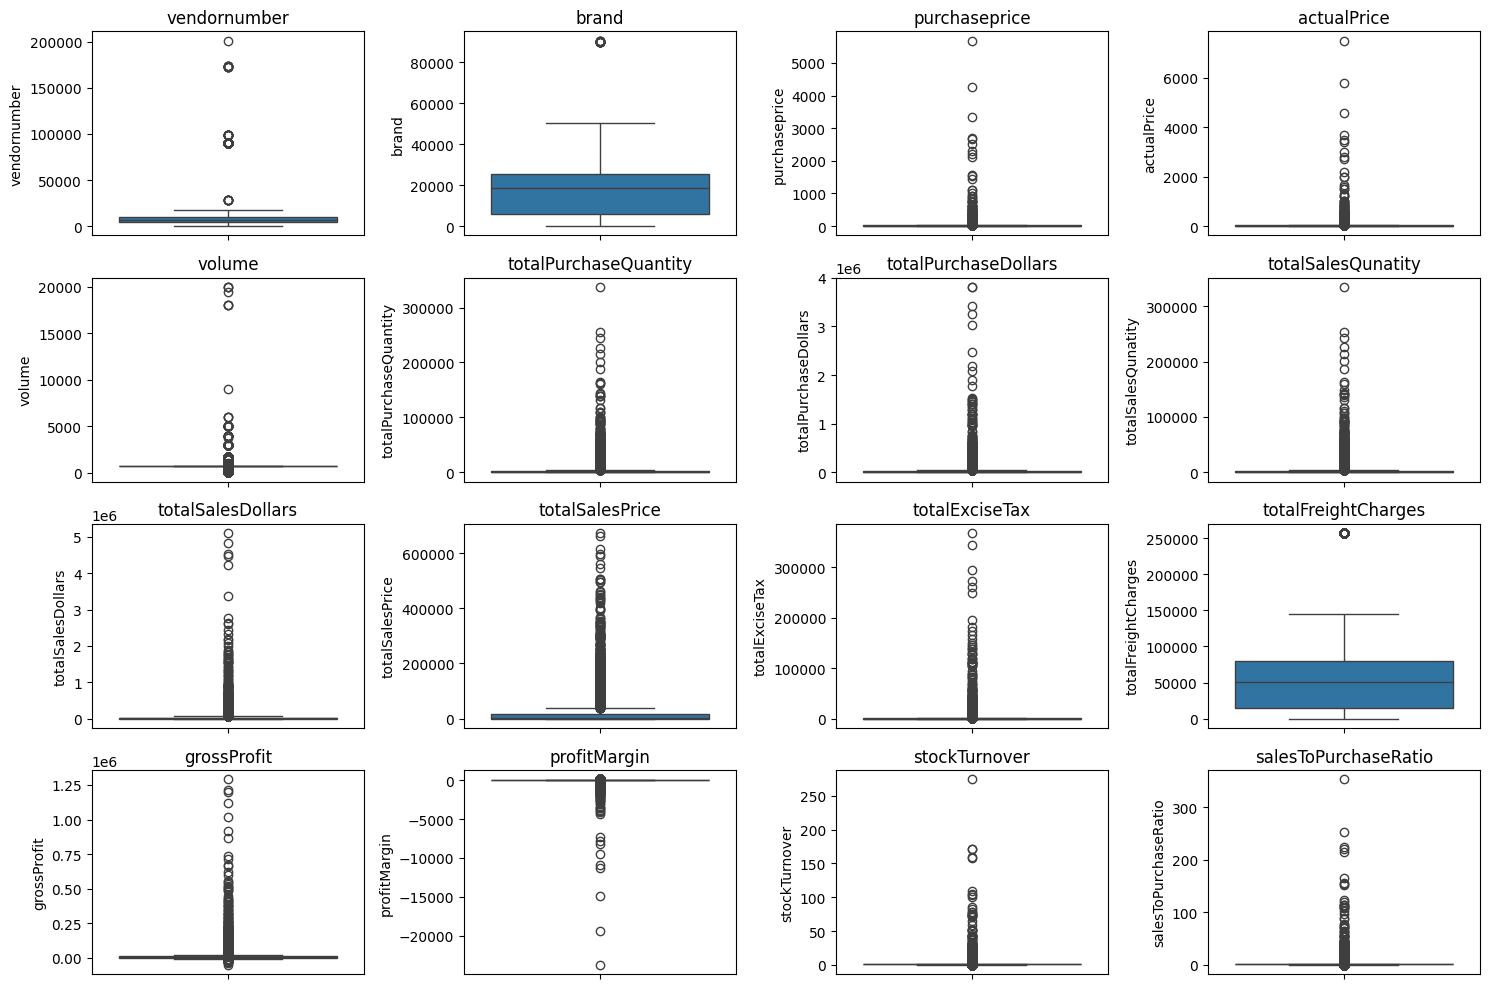

In [12]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Performed outlier analysis and distribution diagnostics using boxplots and histograms. Identified revenue concentration patterns, margin volatility, and vendor performance imbalance across financial and operational KPIs.”

Median values for purchase and sales quantities are closely aligned (~260 units), suggesting healthy inventory movement. However, extreme maximum values (in millions for revenue and profit) highlight the presence of dominant vendors.

While the median profit margin is healthy (~30%), the negative mean margin indicates significant negative outliers, meaning some vendors operate at losses. Freight charges and excise tax vary widely and likely impact profitability.

Stock turnover is generally moderate (~1 cycle), but a few vendors show extremely high turnover, reflecting high-demand brands.

# filtering data by removing inconsistencies

In [ ]:


df = pd.read_sql("""select * from vendor_sales_summary where grossprofit > 0 and profitmargin > 0 and totalsalesqunatity>0""",engine)

In [17]:
df

,vendornumber,vendorname,brand,description,purchaseprice,actualPrice,volume,totalPurchaseQuantity,totalPurchaseDollars,totalSalesQunatity,totalSalesDollars,totalSalesPrice,totalExciseTax,totalFreightCharges,grossProfit,profitMargin,stockTurnover,salesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


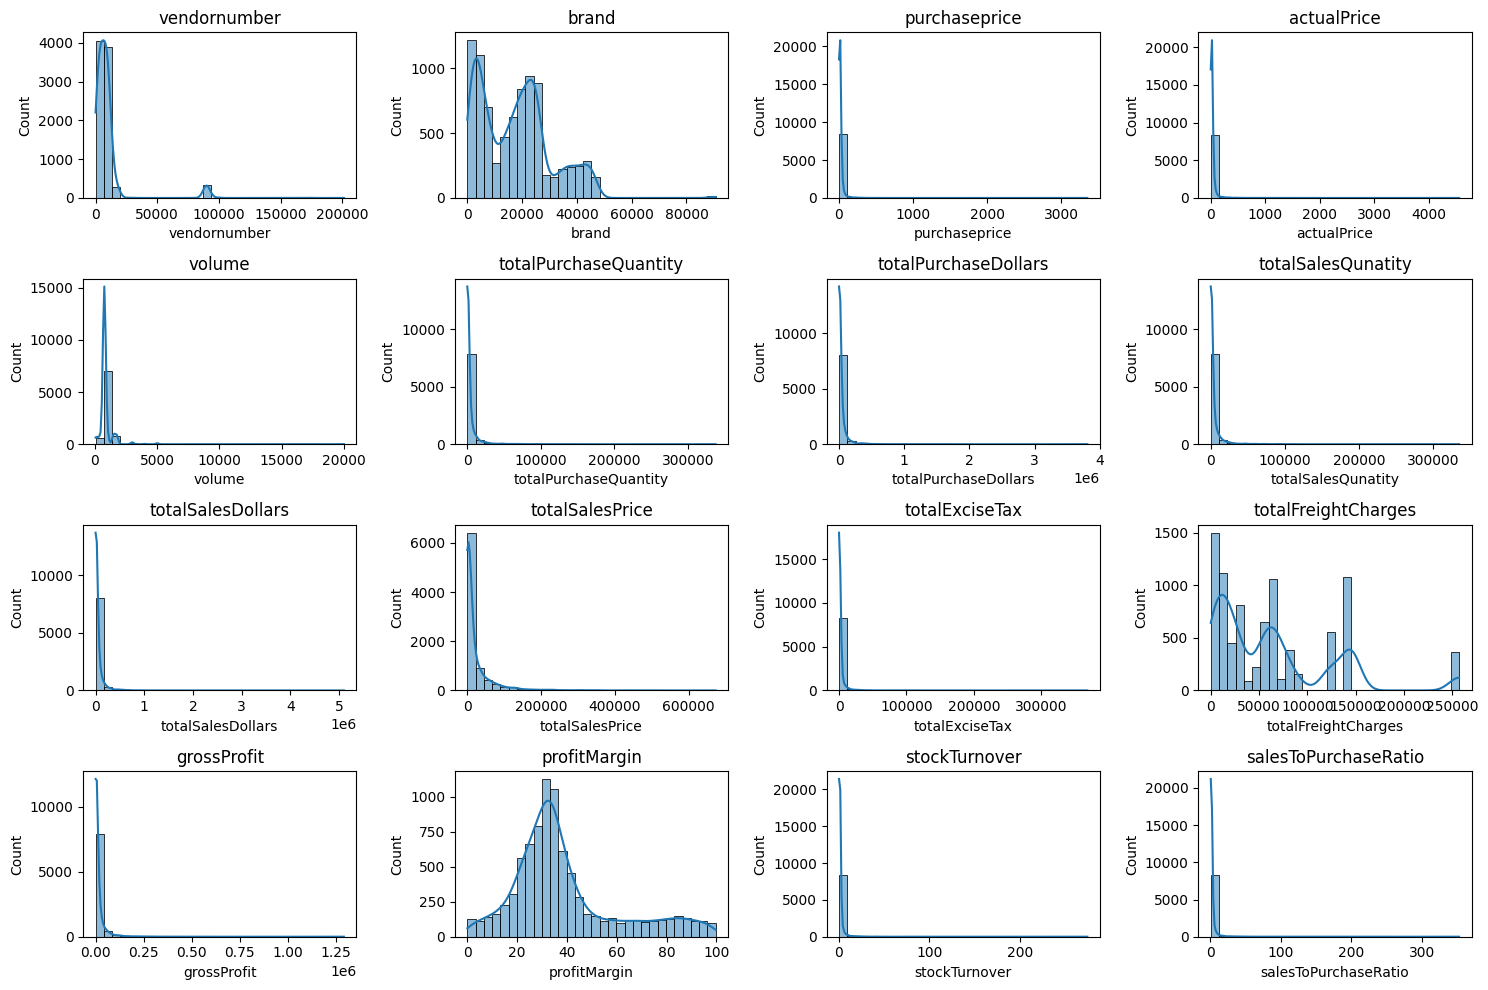

In [18]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

Top 10 vendor and descriptions

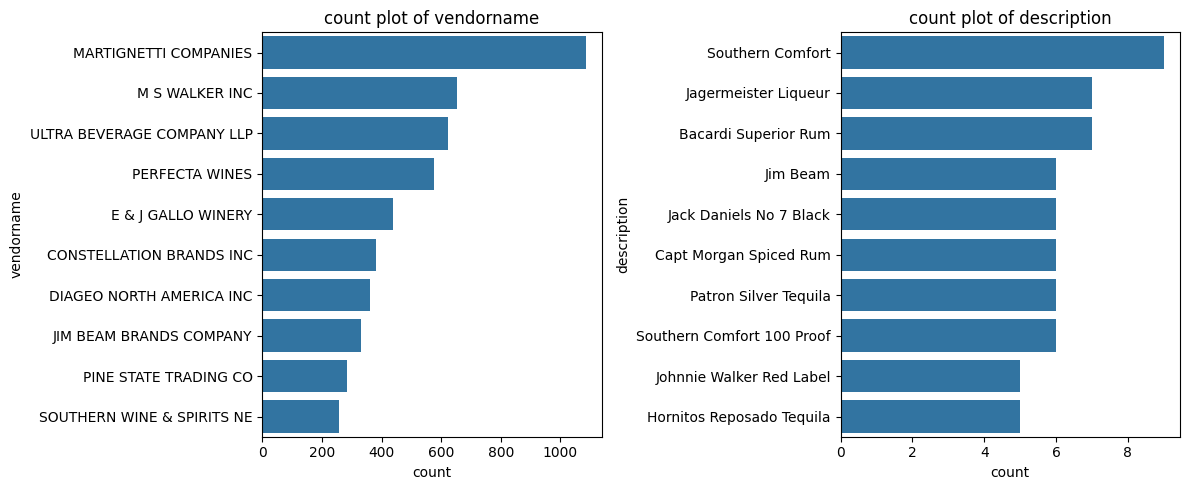

In [19]:
categorical_cols = ['vendorname','description']

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()


Correlation Heatmap

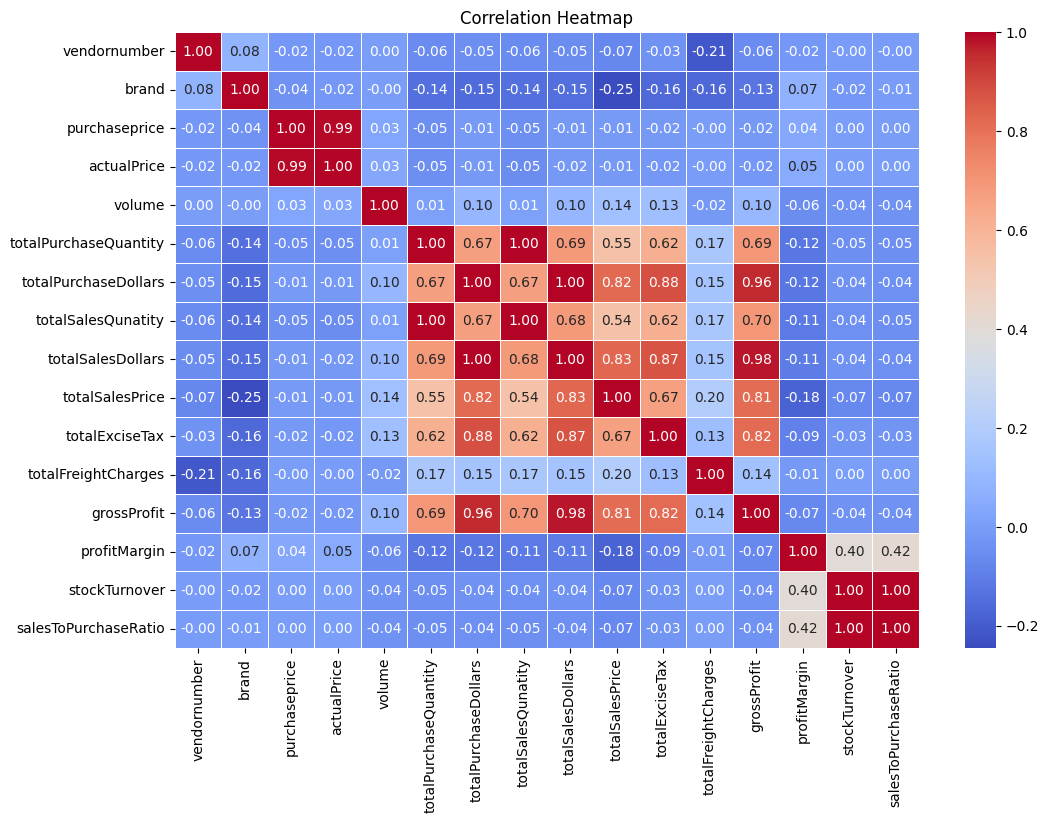

In [20]:
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Sales, purchase, and profit-related variables show very strong positive correlations, indicating they move together and are highly interdependent.

Revenue and tax-related features also have strong logical relationships.

Profit margin has moderate correlation with efficiency metrics like stock turnover.

Vendor, brand, and volume have weak correlation with financial performance.

# Data Analysis 

1 - Top products by total gross profit.

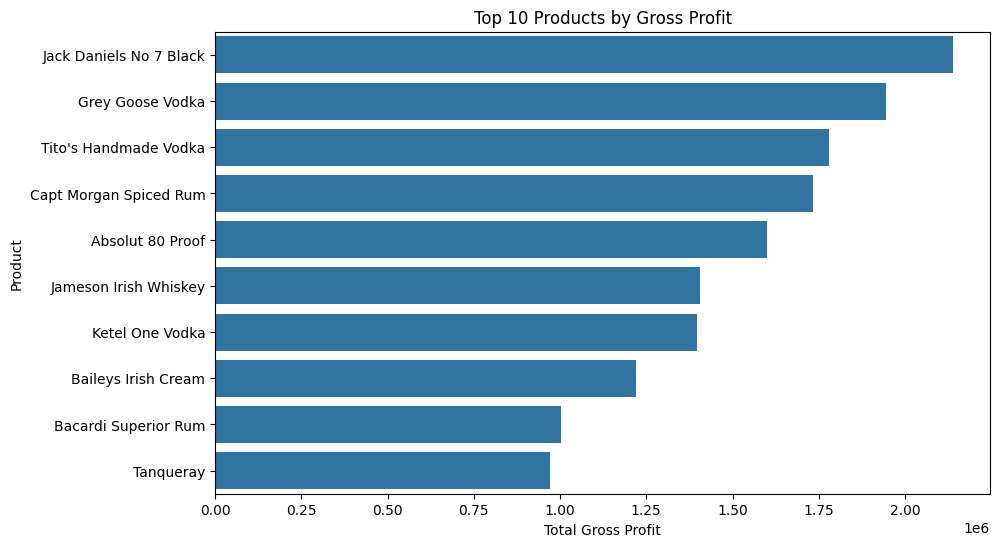

In [25]:
top_products = (
    df.groupby('description')['grossProfit'].sum().sort_values(ascending=False).head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Gross Profit")
plt.xlabel("Total Gross Profit")
plt.ylabel("Product")
plt.show()

2 - Top Vendor by Gross Profit.

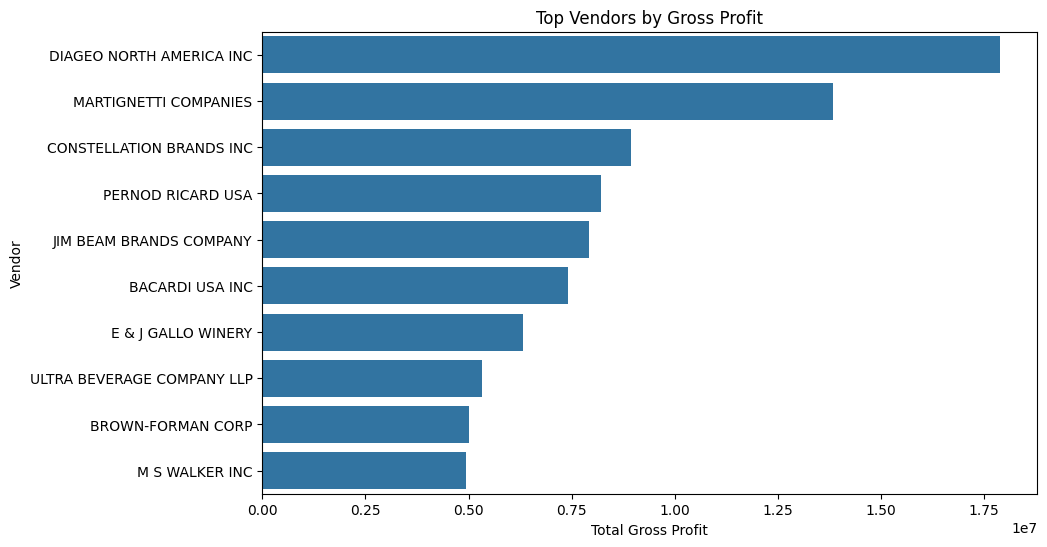

In [26]:
top_vendors = (
    df.groupby("vendorname")["grossProfit"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_vendors.values, y=top_vendors.index)
plt.title("Top Vendors by Gross Profit")
plt.xlabel("Total Gross Profit")
plt.ylabel("Vendor")
plt.show()

3 - Show unsold stock.

In [29]:
df["unsold_stock"] = df["totalPurchaseQuantity"] - df["totalSalesQunatity"]

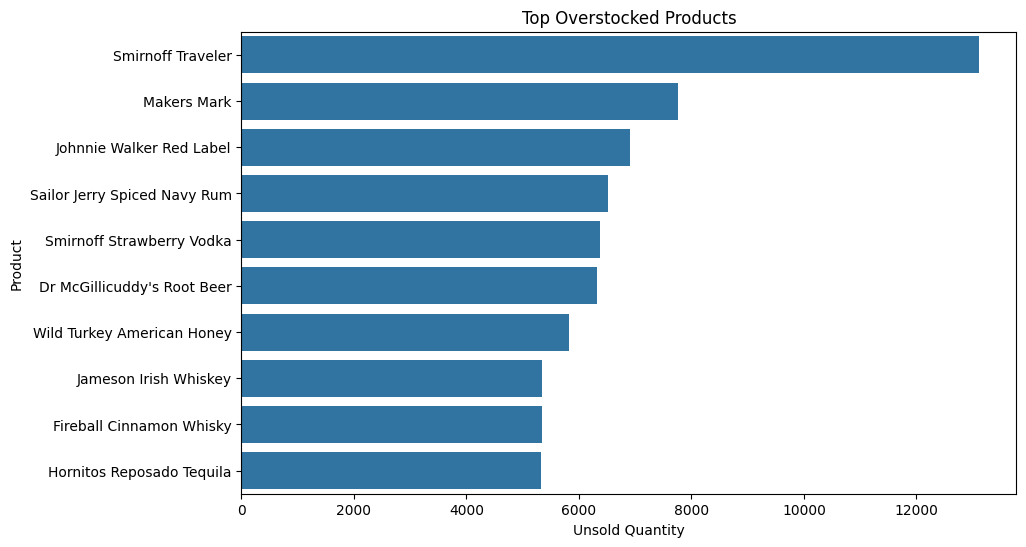

In [30]:
overstock = (
    df.groupby("description")["unsold_stock"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=overstock.values, y=overstock.index)
plt.title("Top Overstocked Products")
plt.xlabel("Unsold Quantity")
plt.ylabel("Product")
plt.show()

4 - Margin vs Sales

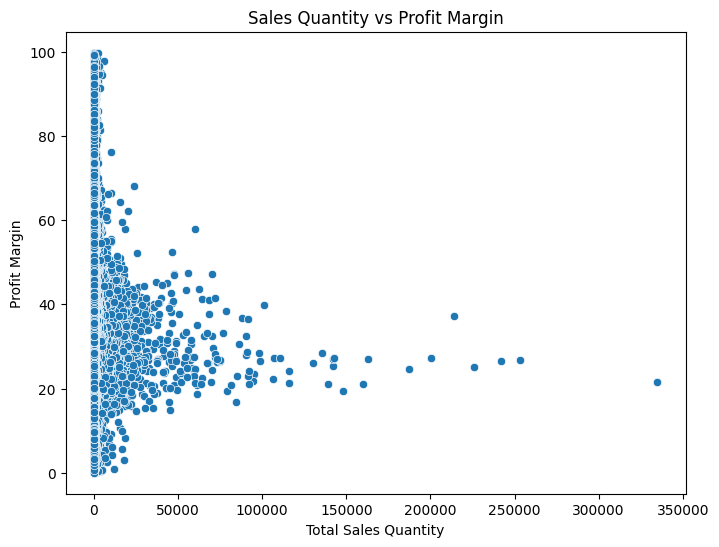

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="totalSalesQunatity",
    y="profitMargin"
)
plt.title("Sales Quantity vs Profit Margin")
plt.xlabel("Total Sales Quantity")
plt.ylabel("Profit Margin")
plt.show()

The scatter analysis shows weak correlation between sales volume and margin, indicating a volume-driven revenue model where high-selling products operate on moderate margins, while high-margin products have limited scale.

5 - Relationship between quantity, price, and revenue.

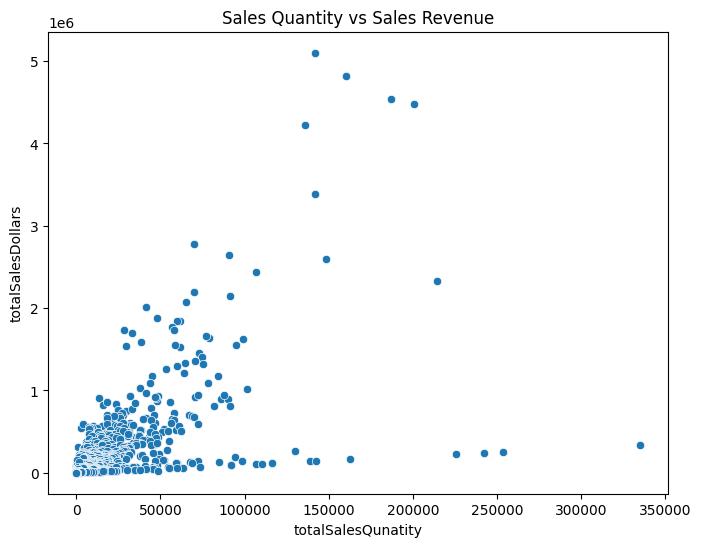

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="totalSalesQunatity",
    y="totalSalesDollars"
)
plt.title("Sales Quantity vs Sales Revenue")
plt.show()

The scatter plot shows a strong positive linear relationship between sales quantity and total sales revenue, indicating that the business model is primarily volume-driven, with revenue concentrated among a limited set of high-selling products.